#### importing library

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import umap.umap_ as umap
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
data=pd.read_csv("people_wiki.csv")

In [4]:
data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
4796,<http://dbpedia.org/resource/Sven-David_Sandst...,Sven-David Sandstr%C3%B6m,svendavid sandstrm born october 30 1942 motala...
4797,<http://dbpedia.org/resource/Billy_Drease_Will...,Billy Drease Williams,billy drease williams born edreys wajed is an ...
4798,<http://dbpedia.org/resource/Brady_Wilks>,Brady Wilks,brady wilks born 1980 is a photographer from t...
4799,<http://dbpedia.org/resource/Kevin_McGrath>,Kevin McGrath,kevin mcgrath is high sheriff of the county of...


In [5]:
data['text']

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
4796,svendavid sandstrm born october 30 1942 motala...
4797,billy drease williams born edreys wajed is an ...
4798,brady wilks born 1980 is a photographer from t...
4799,kevin mcgrath is high sheriff of the county of...


### Preprocessing

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
data['processed_text'] = data["text"].apply(preprocess_text)

In [8]:
# Apply tokenization using lambda
data['token'] = data['processed_text'].apply(lambda text: word_tokenize(text))

In [9]:
data

,URI,name,text,processed_text,token
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b..."
...,...,...,...,...,...
4796,<http://dbpedia.org/resource/Sven-David_Sandst...,Sven-David Sandstr%C3%B6m,svendavid sandstrm born october 30 1942 motala...,svendavid sandstrm born october motala is a sw...,"[svendavid, sandstrm, born, october, motala, i..."
4797,<http://dbpedia.org/resource/Billy_Drease_Will...,Billy Drease Williams,billy drease williams born edreys wajed is an ...,billy drease williams born edreys wajed is an ...,"[billy, drease, williams, born, edreys, wajed,..."
4798,<http://dbpedia.org/resource/Brady_Wilks>,Brady Wilks,brady wilks born 1980 is a photographer from t...,brady wilks born is a photographer from the un...,"[brady, wilks, born, is, a, photographer, from..."
4799,<http://dbpedia.org/resource/Kevin_McGrath>,Kevin McGrath,kevin mcgrath is high sheriff of the county of...,kevin mcgrath is high sheriff of the county of...,"[kevin, mcgrath, is, high, sheriff, of, the, c..."


In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Directly remove stopwords from the tokenized list
data['token_without_stopwords'] = data['token'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)


In [11]:
data

,URI,name,text,processed_text,token,token_without_stopwords
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...,...,...
4796,<http://dbpedia.org/resource/Sven-David_Sandst...,Sven-David Sandstr%C3%B6m,svendavid sandstrm born october 30 1942 motala...,svendavid sandstrm born october motala is a sw...,"[svendavid, sandstrm, born, october, motala, i...","[svendavid, sandstrm, born, october, motala, s..."
4797,<http://dbpedia.org/resource/Billy_Drease_Will...,Billy Drease Williams,billy drease williams born edreys wajed is an ...,billy drease williams born edreys wajed is an ...,"[billy, drease, williams, born, edreys, wajed,...","[billy, drease, williams, born, edreys, wajed,..."
4798,<http://dbpedia.org/resource/Brady_Wilks>,Brady Wilks,brady wilks born 1980 is a photographer from t...,brady wilks born is a photographer from the un...,"[brady, wilks, born, is, a, photographer, from...","[brady, wilks, born, photographer, united, sta..."
4799,<http://dbpedia.org/resource/Kevin_McGrath>,Kevin McGrath,kevin mcgrath is high sheriff of the county of...,kevin mcgrath is high sheriff of the county of...,"[kevin, mcgrath, is, high, sheriff, of, the, c...","[kevin, mcgrath, high, sheriff, county, greate..."


In [12]:
nltk.download('wordnet', quiet=True)
wordnet_lemmatizer = WordNetLemmatizer()


In [13]:
data['lemmatized_tokens'] = data['token_without_stopwords'].apply(
    lambda tokens: [wordnet_lemmatizer.lemmatize(token) for token in tokens]
)

In [14]:
data.iloc[:,3:]

,processed_text,token,token_without_stopwords,lemmatized_tokens
0,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra...","[digby, morrell, born, october, former, austra..."
1,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac...","[harpdog, brown, singer, harmonica, player, ac..."
3,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...
4796,svendavid sandstrm born october motala is a sw...,"[svendavid, sandstrm, born, october, motala, i...","[svendavid, sandstrm, born, october, motala, s...","[svendavid, sandstrm, born, october, motala, s..."
4797,billy drease williams born edreys wajed is an ...,"[billy, drease, williams, born, edreys, wajed,...","[billy, drease, williams, born, edreys, wajed,...","[billy, drease, williams, born, edreys, wajed,..."
4798,brady wilks born is a photographer from the un...,"[brady, wilks, born, is, a, photographer, from...","[brady, wilks, born, photographer, united, sta...","[brady, wilks, born, photographer, united, sta..."
4799,kevin mcgrath is high sheriff of the county of...,"[kevin, mcgrath, is, high, sheriff, of, the, c...","[kevin, mcgrath, high, sheriff, county, greate...","[kevin, mcgrath, high, sheriff, county, greate..."


In [15]:
data['clean_text'] = data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [16]:
data['clean_text'] = data['clean_text'].apply(lambda text: ' '.join(text.split()[2:]))

In [17]:
data["clean_text"]

,clean_text
0,born october former australian rule footballer...
1,lewy aka sandy lewy graduated university chica...
2,singer harmonica player active canada blue sce...
3,born waidmannsfeld lower austria austria janua...
4,born december tallinn better known stagename g...
...,...
4796,born october motala swedish classical composer...
4797,williams born edreys wajed american hip hop em...
4798,born photographer united state best known alte...
4799,high sheriff county greater london chairman ly...


#### data vectorization(CountVectorizer)

In [18]:

vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(data["clean_text"])

In [19]:
print(doc_term_matrix)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 623826 stored elements and shape (4801, 84153)>
  Coords	Values
  (0, 9223)	1
  (0, 53121)	1
  (0, 27572)	1
  (0, 5212)	3
  (0, 64651)	1
  (0, 27416)	1
  (0, 57579)	3
  (0, 39139)	3
  (0, 11819)	2
  (0, 27411)	10
  (0, 42154)	4
  (0, 1143)	1
  (0, 81317)	1
  (0, 5191)	1
  (0, 49294)	4
  (0, 22314)	1
  (0, 67146)	3
  (0, 81303)	2
  (0, 56602)	1
  (0, 28818)	3
  (0, 11714)	1
  (0, 25548)	1
  (0, 70231)	1
  (0, 14417)	6
  (0, 42144)	2
  :	:
  (4800, 14125)	1
  (4800, 31299)	2
  (4800, 17820)	1
  (4800, 27203)	1
  (4800, 49302)	1
  (4800, 10271)	1
  (4800, 14129)	1
  (4800, 65175)	1
  (4800, 18304)	1
  (4800, 56735)	1
  (4800, 42559)	1
  (4800, 26259)	1
  (4800, 73792)	1
  (4800, 65338)	1
  (4800, 38488)	1
  (4800, 23675)	1
  (4800, 28505)	1
  (4800, 6975)	1
  (4800, 23084)	1
  (4800, 71895)	1
  (4800, 44534)	1
  (4800, 22569)	1
  (4800, 24532)	1
  (4800, 61206)	1
  (4800, 21373)	1


#### Dimentinal reduction(LDA+UMAP)

In [20]:
lda_model = LatentDirichletAllocation(
            n_components=10,
            random_state=42,
            learning_method='online'
        )
topic_dist = lda_model.fit_transform(doc_term_matrix)

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2D
topic_umap = reducer.fit_transform(topic_dist)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### AgglomerativeClustering

In [24]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=False)
agg_clusters = agg_clustering.fit_predict(topic_umap)


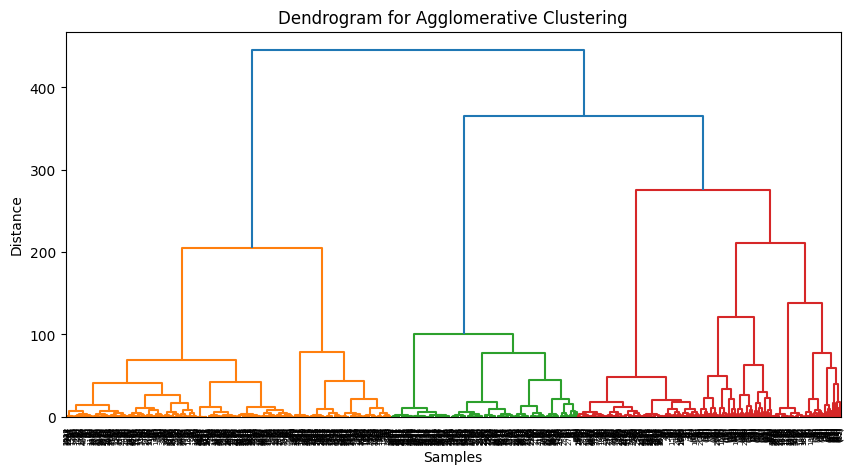

In [27]:
# Step 4: Plot Dendrogram
plt.figure(figsize=(10, 5))
linked = linkage(topic_umap, method='ward')  # Hierarchical clustering linkage
dendrogram(linked, truncate_mode="level", p=10)  # Adjust 'p' to control depth
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()